<a href="https://colab.research.google.com/github/Sumaira-Ashraf/polynomial-eq/blob/main/polynomialeq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose the type of equation:
1. Linear Equation (ax + b = 0)
2. Polynomial Equation
Enter your choice (1 for Linear, 2 for Polynomial): 2

You chose to solve a Polynomial Equation
Enter the degree of the polynomial: 3
Enter the coefficient for x^3: 6
Enter the coefficient for x^2: 9
Enter the coefficient for x^1: 4
Enter the coefficient for x^0: 1

The polynomial equation is: 6.0*x**3 + 9.0*x**2 + 4.0*x + 1.0 = 0
The solutions to the polynomial are: [-1.00000000000000, -0.25 - 0.322748612183951*I, -0.25 + 0.322748612183951*I]


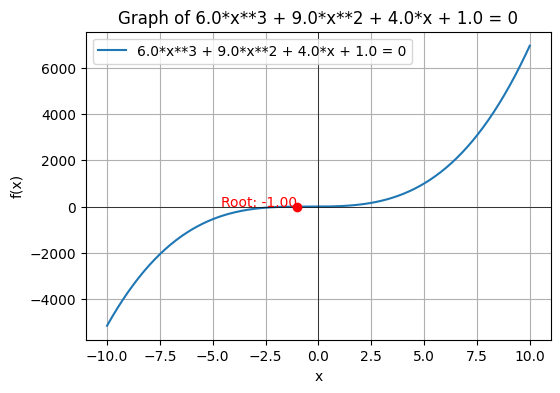

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Function to solve a linear equation (ax + b = 0)
def solve_linear(a, b):
    if a == 0:
        return "No solution (a cannot be 0 for a linear equation)"
    solution = -b / a
    return solution

# Function to solve a polynomial equation
def solve_polynomial(coefficients):
    x = sp.symbols('x')
    polynomial = sum([coeff * x**i for i, coeff in enumerate(coefficients)])
    solutions = sp.solve(polynomial, x)
    return polynomial, solutions

# Function to plot the equation (linear or polynomial)
def plot_equation(coefficients, solutions, title):
    x_vals = np.linspace(-10, 10, 400)
    y_vals = sum([coeff * x_vals**i for i, coeff in enumerate(coefficients)])

    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_vals, label=f'{title}')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)

    # Highlight roots if they exist
    if solutions:
        for sol in solutions:
            if sp.im(sol) == 0:  # Plot only real solutions
                plt.scatter(float(sol), 0, color='red', zorder=5)
                plt.text(float(sol), 0, f'Root: {float(sol):.2f}', fontsize=10, color='red', ha='right')

    plt.title(f'Graph of {title}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

def main():
    print("Choose the type of equation:")
    print("1. Linear Equation (ax + b = 0)")
    print("2. Polynomial Equation")

    choice = int(input("Enter your choice (1 for Linear, 2 for Polynomial): "))

    if choice == 1:
        print("\nYou chose to solve a Linear Equation (ax + b = 0)")

        # Input coefficients for the linear equation
        a = float(input("Enter the coefficient a (for x): "))
        b = float(input("Enter the constant b: "))

        if a != 0:
            # Solve the linear equation
            solution = solve_linear(a, b)
            print(f"\nThe solution to the linear equation {a}x + {b} = 0 is: x = {solution}")

            # Plot the linear equation
            plot_equation([b, a], [solution], f'{a}x + {b} = 0')
        else:
            print("Coefficient 'a' cannot be 0 for a linear equation.")

    elif choice == 2:
        print("\nYou chose to solve a Polynomial Equation")

        # Input the degree of the polynomial
        degree = int(input("Enter the degree of the polynomial: "))

        # Input coefficients for the polynomial equation
        coefficients = []
        for i in range(degree, -1, -1):
            coeff = float(input(f"Enter the coefficient for x^{i}: "))
            coefficients.append(coeff)

        coefficients.reverse()  # Reverse to match the correct power order

        # Solve the polynomial equation
        polynomial, solutions = solve_polynomial(coefficients)

        print(f"\nThe polynomial equation is: {polynomial} = 0")
        print(f"The solutions to the polynomial are: {solutions}")

        # Plot the polynomial equation
        plot_equation(coefficients, solutions, f'{polynomial} = 0')

    else:
        print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()
